In [41]:
import warnings
warnings.filterwarnings("ignore")
import os

#To disable all logging output from TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import tensorflow as tf

from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, InputLayer
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

In [42]:
df=pd.read_csv("transformed_df.csv")

In [43]:
def replace_with_unique(df, column: str):
    uniques = df[column].unique()
    mapping = dict(zip(uniques, range(0, len(uniques))))
    df[column].replace(mapping, inplace=True)
    return df
replace_with_unique(df, "diagnostic")


,age,bleed,grew,itch,elevation,changed,background_mother,background_father,has_sewage_system,region,smoke,gender,pesticide,fitspatrick,hurt,diagnostic,img_id,image_path
0,0.404762,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,PAT_169_694_411.png,./cancer/all_cancer_images/PAT_169_694_411.png
1,0.511905,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,PAT_38_1003_68.png,./cancer/all_cancer_images/PAT_38_1003_68.png
2,0.607143,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,PAT_65_101_847.png,./cancer/all_cancer_images/PAT_65_101_847.png
3,0.666667,0,0,1,1,0,1,1,0,0,0,0,0,1,1,0,PAT_69_1053_540.png,./cancer/all_cancer_images/PAT_69_1053_540.png
4,0.809524,1,0,1,1,0,1,1,0,0,0,0,1,1,1,0,PAT_260_400_566.png,./cancer/all_cancer_images/PAT_260_400_566.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.726190,0,0,0,0,0,1,1,0,0,1,1,1,0,0,4,PAT_216_331_678.png,./cancer/all_cancer_images/PAT_216_331_678.png
368,0.714286,0,1,1,1,0,1,1,1,0,0,1,0,1,0,4,PAT_365_751_709.png,./cancer/all_cancer_images/PAT_365_751_709.png
369,0.702381,0,1,1,1,1,0,0,1,0,1,1,0,0,0,4,PAT_771_1488_562.png,./cancer/all_cancer_images/PAT_771_1488_562.png
370,0.619048,1,1,1,1,0,1,1,1,0,1,0,0,1,0,4,PAT_319_680_832.png,./cancer/all_cancer_images/PAT_319_680_832.png


In [ ]:
df_naked=df[['region_ABDOMEN', 'region_ARM', 'region_BACK', 'region_CHEST',
       'region_EAR', 'region_FACE', 'region_FOOT', 'region_FOREARM',
       'region_HAND', 'region_LIP', 'region_NECK', 'region_NOSE',
       'region_SCALP', 'region_THIGH', 'age', 'bleed', 'grew', 'itch',
       'elevation', 'changed', 'smoke', 'pesticide', 'hurt', 'diagnostic',]]
df_naked.columns

In [44]:
import numpy as np
X  = np.array(df.drop(df[["diagnostic","img_id", "image_path"]], axis=1))
y = np.array(df["diagnostic"])

In [45]:
X.shape

(372, 15)

In [46]:
y.shape

(372,)

In [56]:
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

ValueError: y should be a 1d array, got an array of shape (372, 5) instead.

In [87]:
K.clear_session()
model = Sequential()

In [88]:
X[1].shape

(15,)

In [89]:
model = Sequential()
model.add(InputLayer(input_shape=X[0].shape))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 8)                 128       
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
Total params: 413
Trainable params: 413
Non-trainable params: 0
_________________________________________________________________


In [90]:
from tensorflow import keras
model.compile(optimizer=Adam(learning_rate=0.01), loss=keras.losses.categorical_crossentropy, metrics=[keras.metrics.categorical_accuracy])
history = model.fit(X, y, batch_size=32, epochs=10_000, validation_split=0.2)

Epoch 1/1000
10/10 [==============================] - 1s 12ms/step - loss: 1.7223 - categorical_accuracy: 0.1481 - val_loss: 1.7190 - val_categorical_accuracy: 0.0000e+00
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.5610 - categorical_accuracy: 0.3300 - val_loss: 1.8646 - val_categorical_accuracy: 0.0000e+00
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.5084 - categorical_accuracy: 0.3670 - val_loss: 2.0544 - val_categorical_accuracy: 0.0000e+00
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.4429 - categorical_accuracy: 0.4175 - val_loss: 2.1809 - val_categorical_accuracy: 0.0000e+00
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.3799 - categorical_accuracy: 0.4209 - val_loss: 2.2975 - val_categorical_accuracy: 0.0000e+00
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 1.2720 - categorical_accuracy: 0.4512 - val_loss: 2.4416 - val_categorical_

In [35]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

<Axes: >

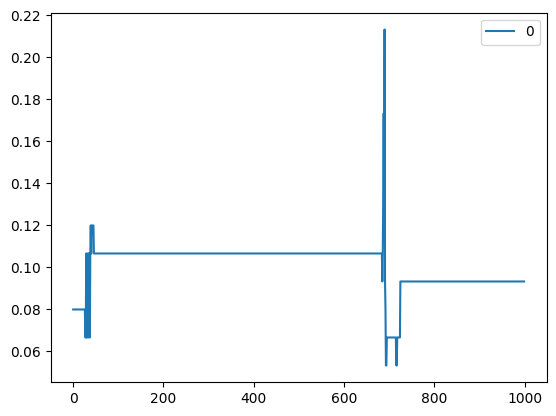

In [40]:
pd.DataFrame(history.history["val_categorical_accuracy"]).plot()

In [ ]:
model.save("model_moons.h5")

In [ ]:
ypred = model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=ypred[:, 0])